# code for moment of velocities
Briquet and Aerts
https://www.aanda.org/articles/aa/pdf/2003/05/aa3122.pdf

In [2]:
import numpy as np
import matplotlib.pyplot as plt

array([1.        , 0.9996872 , 0.99874901, ..., 0.95063903, 0.95810222,
       0.96496603])

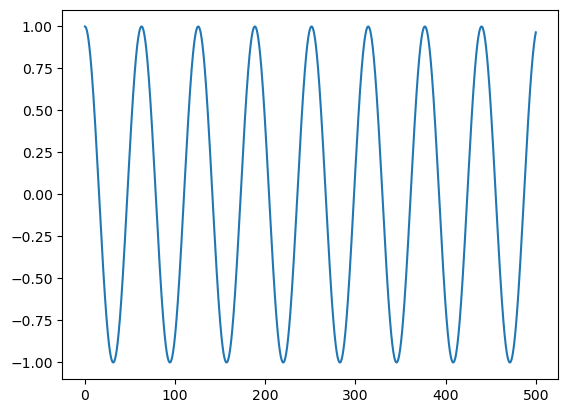

In [18]:
def avg_v_one_mode(times, omega, psi, A, B, sigma, vrot):
    """<v> for one mode"""
    return A*np.cos(omega*times + psi)
t= np.linspace(0,500,2000)
omega = .1
psi=0
A = 1

plt.plot(t, avg_v_one_mode(t, omega, psi, A, np.nan, 1, 1))
avg_v_one_mode(t, omega, psi, A, np.nan, 1, 1)

array([1.        , 0.9996872 , 0.99874901, ..., 0.95063903, 0.95810222,
       0.96496603])

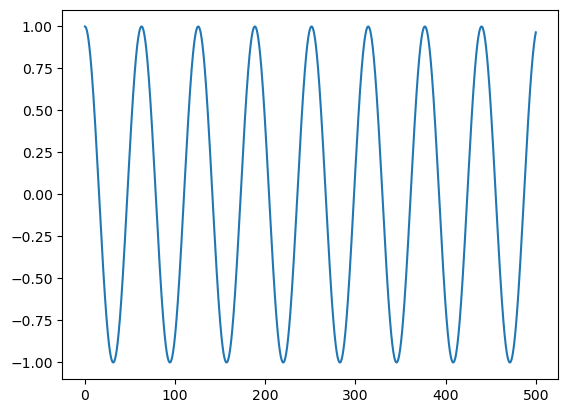

In [17]:
def avg_v_multi_mode(times, omega, psi, A, B, sigma, vrot):
    """<v> for multiple modes"""
    answer=0
    for i in range(len(A)):
        answer = A[i]*np.cos(omega[i]*times + psi[i])
    return answer

plt.plot(t, avg_v_multi_mode(t, [omega], [psi], [A], np.nan, 1, 1))
avg_v_multi_mode(t, [omega], [psi], [A], np.nan, 1, 1)

array([5.41421356, 5.46246419, 5.50714962, ..., 4.52127938, 4.60931606,
       4.69475334])

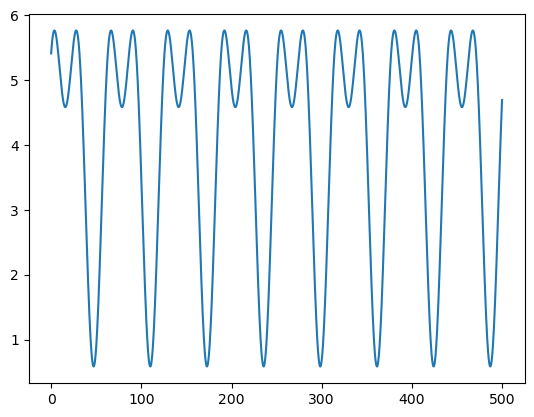

In [26]:
def avg_v2_one_mode(times, omega, psi, A, B, sigma, vrot):
    """<v^2> for one mode"""
    C = np.sqrt(A^2-B^2)
    term1 = C*np.cos(2*omega*t+2*psi)
    
    D = 2*vrot*B
    term2 = D*np.sin(omega*t + psi)
    
    term3 = 0
    term4 = 0
    # double summations are 0
#     Cb1 = .5*(A*A + B*B)
#     term3 = Cb1*np.cos(omega*t + psi)
    
#     Cs1 = .5*(A*A - B*B)
#     term4 = Cb1*np.cos(omega*t + psi)
    
    E12 = .5*(A^2+B^2)
    Erot = vrot^2
    term5 = E12+Erot+sigma
    
    return term1+term2+term3+term4+term5
B=1
plt.plot(t, avg_v2_one_mode(t, omega, psi, A, B, 1, 1))
avg_v2_one_mode(t, omega, psi, A, B, 1, 1)

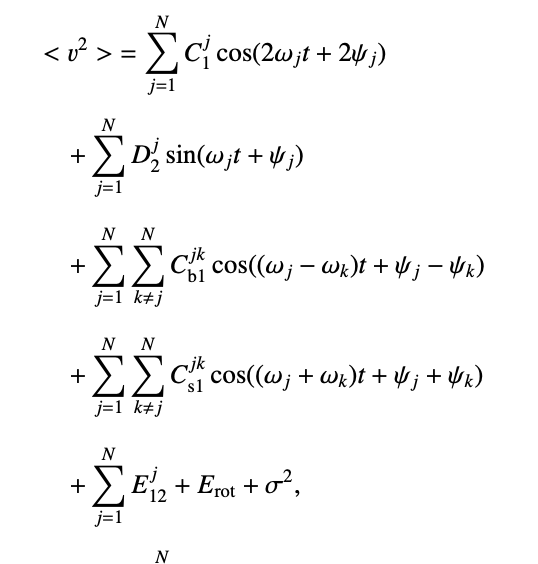

array([5.41421356, 5.46246419, 5.50714962, ..., 4.52127938, 4.60931606,
       4.69475334])

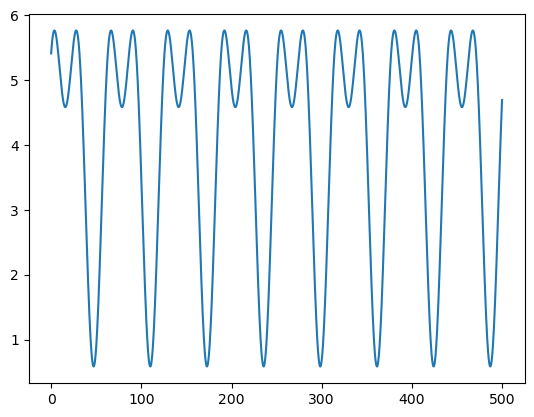

In [24]:
def avg_v2_multi_mode(times, omega, psi, A, B, sigma, vrot):
    """<v^2> for multiple modes"""
    # constants
    N=len(A)
    Erot = vrot^2
    
    # start off summation with terms 0
    total_term1 = 0
    total_term2 = 0
    total_term3 = 0
    total_term4 = 0
    total_term5 = 0
        

    for j in range(N):
        C = np.sqrt(A[j]^2-B[j]^2)
        term1 = C*np.cos(2*omega[j]*t+2*psi[j])
        total_term1+=term1
        
        D = 2*vrot*B[j]
        term2 = D*np.sin(omega[j]*t + psi[j])
        total_term2+=term2
        
        # calculate the inner summations
        for k in range(N):
            if k != j:
                Cb1 = .5*(A[j]*A[k] + B[j]*B[k])
                term3 = Cb1*np.cos((omega[j]-omega[k])*t + psi[j] - psi[k])
                total_term3+=term3
                # term 4 has sum over same bounds
                Cs1 = .5*(A[j]*A[k] - B[j]*B[k])
                term4 = Cb1*np.cos((omega[j] + omega[k])*t + psi[j] + psi[k])
                total_term4+=term4
        
        
        E12 = .5*(A[j]^2+B[j]^2)
        term5 = E12+Erot+sigma
        total_term5+=term5
    total = total_term1+total_term2+total_term3+total_term4+total_term5
    return total
plt.plot(t, avg_v2_multi_mode(t, [omega], [psi], [A], [B], 1, 1))
avg_v2_multi_mode(t, [omega], [psi], [A], [B], 1, 1)